<a href="https://colab.research.google.com/github/fathanick/Python-basic/blob/master/04_Visualization_word_cloud_and_bar_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Dataset

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel("/content/drive/My Drive/DATASETS/Copy of news-clean-data.xlsx")

In [ ]:
df.head()

,text
0,xl axiata mengambil semangat baik semangat men...
1,pembangunan jaringan data jawa meningkatkan ku...
2,tahun cakupan layanan data lte xl axiata menca...
3,sasar wilayah terpencil xl resmikan jaringan t...
4,jaringan lte xl axiata menjangkau kota kabupat...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4914 entries, 0 to 4913
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    4914 non-null   object
dtypes: object(1)
memory usage: 38.5+ KB


In [ ]:
df.count()

text    4914
dtype: int64

In [ ]:
len(df)

4914

##Wordcloud

In [ ]:
pip install wordcloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

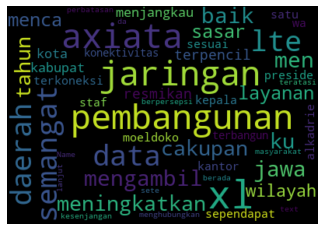

In [ ]:
#generate word cloud
#change object into string using str()
txt = str(df['text'])
#word_cloud = WordCloud().generate(txt) 

#add parameters to WordCloud
word_cloud = WordCloud(max_font_size=50, 
                       max_words=50, 
                       background_color="black",
                       width=400,
                       height=280).generate(txt) 

#show image
plt.imshow(word_cloud, interpolation='bilinear') # .imshow will display data as an image
plt.axis("off") #hide axis values
plt.show() #show data

For more information about word cloud, read the documentation in this link:
https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html

In [ ]:
#save image to file
plt.savefig("wordcloud_result.png", format="png")

<Figure size 432x288 with 0 Axes>

##Count Word Frequency with Bar Plot using Pandas

In [ ]:
from collections import Counter

word_dict = Counter(" ".join(df['text'].values.tolist()).split(" ")).items()
print(word_dict)

dict_items([('xl', 89), ('axiata', 38), ('mengambil', 36), ('semangat', 11), ('baik', 190), ('mendasari', 3), ('komitmen', 34), ('berusaha', 8), ('mengembangkan', 22), ('jaringan', 305), ('data', 84), ('berkualitas', 13), ('berbagai', 74), ('penjuru', 3), ('tanah', 105), ('air', 235), ('pembangunan', 1249), ('jawa', 301), ('meningkatkan', 140), ('kualitas', 52), ('layanan', 78), ('prioritasnya', 3), ('dilaksanakan', 49), ('luar', 88), ('melanjutkan', 39), ('perluasan', 18), ('tahun', 680), ('cakupan', 7), ('lte', 12), ('mencapai', 229), ('total', 138), ('pengembangan', 127), ('mengalokasikan', 13), ('anggaran', 149), ('belanja', 17), ('modal', 71), ('capex', 6), ('sekira', 10), ('triliun', 186), ('sasar', 3), ('wilayah', 248), ('terpencil', 31), ('resmikan', 21), ('telekomunikasi', 84), ('menjangkau', 7), ('kota', 331), ('kabupaten', 317), ('indonesia', 585), ('ditopang', 7), ('bts', 34), ('dibangun', 201), ('sepanjang', 255), ('berada', 98), ('berhasil', 48), ('akses', 155), ('video',

In [ ]:
df_word = pd.DataFrame(word_dict, columns=['word','frequency'])
df_word.head()

,word,frequency
0,xl,89
1,axiata,38
2,mengambil,36
3,semangat,11
4,baik,190


In [ ]:
#sort by frequency
sorted_word = df_word.sort_values(by=['frequency'], ascending=False).head()
print(sorted_word)

              word  frequency
284          jalan       1859
16     pembangunan       1249
92   infrastruktur        921
76          proyek        812
526            tol        688


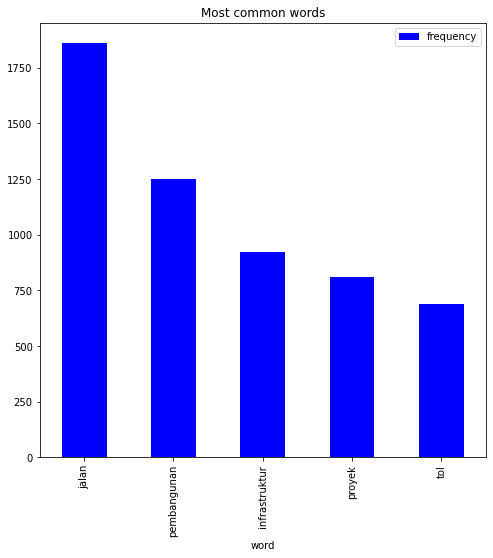

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

sorted_word.plot.bar(x='word', 
                      y='frequency',
                      ax=ax,
                      color='blue')

ax.set_title("Most common words")
plt.show()

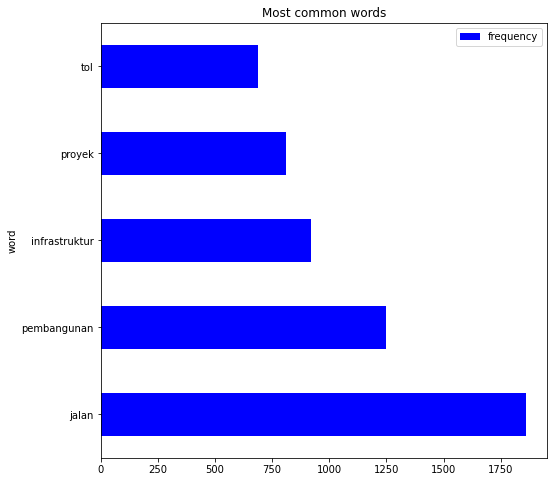

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

sorted_word.plot.barh(x='word', 
                      y='frequency',
                      ax=ax,
                      color='blue')

ax.set_title("Most common words")
plt.show()

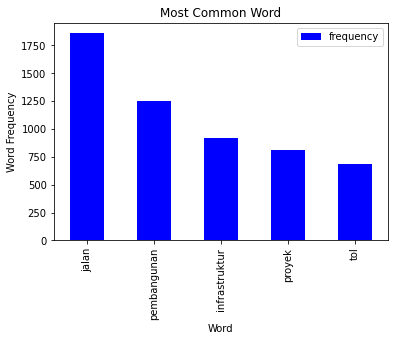

<Figure size 432x288 with 0 Axes>

In [ ]:
#simple way
#read this reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html

sorted_word.plot(kind='bar', x='word', color="blue")
plt.xlabel("Word")
plt.ylabel("Word Frequency")
plt.title("Most Common Word")
plt.show()

#save image
plt.savefig("bar-plot.png", format="png")

##Pie Chart

In [ ]:
df_article = pd.read_excel("/content/drive/My Drive/DATASETS/Copy of judul-artikel-islam.xlsx")
df_article.head()

,id_artikel,Judul,Kategori
0,1,Adab – Adab Bersisir,Adab dan Akhlak
1,2,Adab Bertetangga,Adab dan Akhlak
2,3,Adab dalam Berhias : Larangan Berhias dengan y...,Adab dan Akhlak
3,4,Adab Doa Nabi Ibrahim 'alaihissalam,Adab dan Akhlak
4,5,Adab Ketika Mendengar Khutbah Jumat,Adab dan Akhlak


In [ ]:
#get unique "Kategori"
df_article['Kategori'].unique()

array(['Adab dan Akhlak', "Al Qur'an", 'Aqidah', 'Dzikir dan Doa', 'Fiqh',
       'Hadits', 'Manhaj'], dtype=object)

In [ ]:
#group by and count
df_article.groupby('Kategori')['Judul'].count()

Kategori
Adab dan Akhlak    188
Al Qur'an          124
Aqidah             172
Dzikir dan Doa      95
Fiqh               208
Hadits             113
Manhaj             112
Name: Judul, dtype: int64

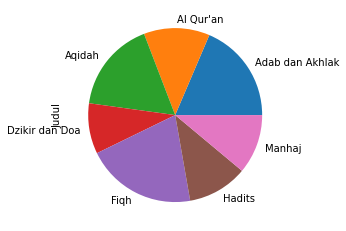

In [ ]:
df_article.groupby('Kategori')['Judul'].count().plot(kind='pie',subplots='True')
plt.show()